In [210]:
import pandas as pd
import numpy as np
df = pd.read_csv("Life Expectancy Data.csv")

In [211]:
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace=True)
df['Alcohol'].fillna(df['percentage expenditure'].mean(), inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)
df[' BMI '].fillna(df[' BMI '].mean(), inplace=True)
df['Polio'].fillna(df['Polio'].mean(), inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(), inplace=True)
df['GDP'].fillna(df['GDP'].mean(), inplace=True)
df['Population'].fillna(df['Population'].mean(), inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(), inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(), inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)

df.drop(columns = ["Country"], inplace = True)

one_hot = pd.get_dummies(df['Status'])
df = df.drop('Status',axis = 1)
df = df.join(one_hot)


df = df[df['Life expectancy '].notna()]

In [212]:
# std_scaler = StandardScaler()
# df_scaled = std_scaler.fit_transform(df.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=['])

In [213]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
 
# df_scaled = scaler.fit_transform(df.to_numpy())
# df_scaled = pd.DataFrame(df_scaled, columns=

In [214]:
df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [215]:
X = df.drop(columns = ["Life expectancy "])
y = df["Life expectancy "]

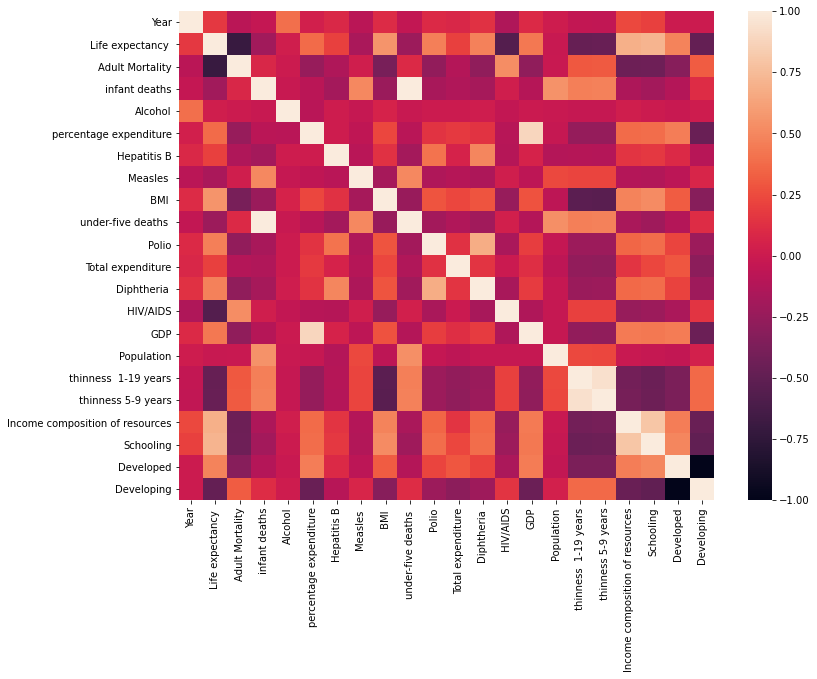

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,9))
sns.heatmap(df.corr())

<Figure size 2160x2160 with 0 Axes>

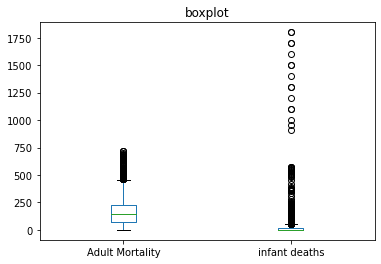

In [217]:
plt.figure(figsize=(30,30))
df[['Adult Mortality', 'infant deaths']].plot(kind='box', title='boxplot')

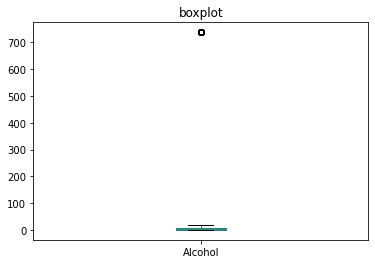

In [218]:
df[['Alcohol']].plot(kind='box', title='boxplot')

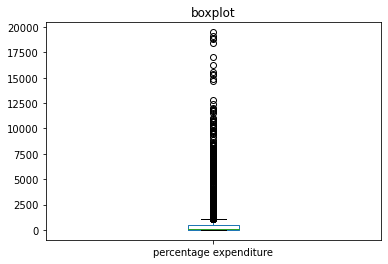

In [219]:
df[['percentage expenditure']].plot(kind='box', title='boxplot')

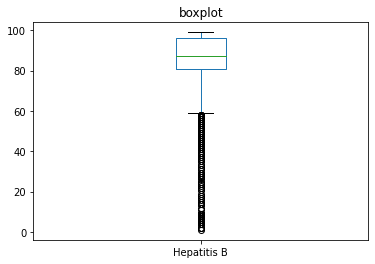

In [220]:
df[['Hepatitis B']].plot(kind='box', title='boxplot')

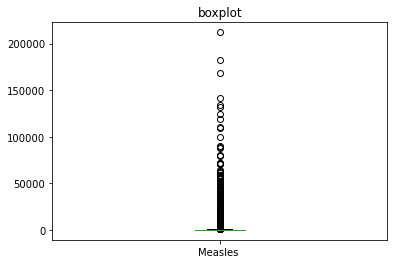

In [221]:
df[['Measles ']].plot(kind='box', title='boxplot')

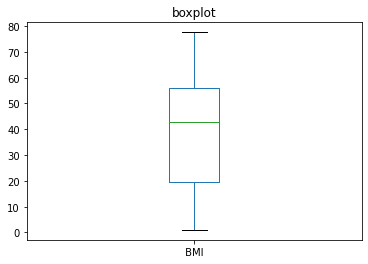

In [222]:
df[[' BMI ']].plot(kind='box', title='boxplot')

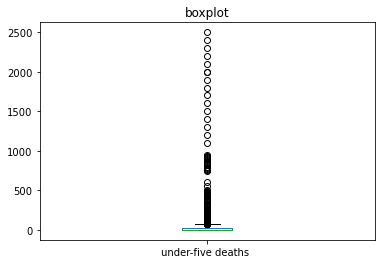

In [223]:
df[['under-five deaths ']].plot(kind='box', title='boxplot')

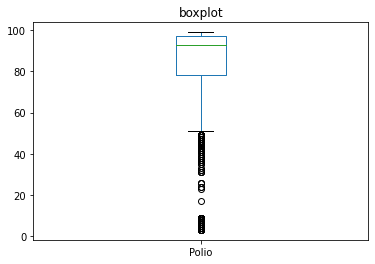

In [224]:
df[['Polio']].plot(kind='box', title='boxplot')

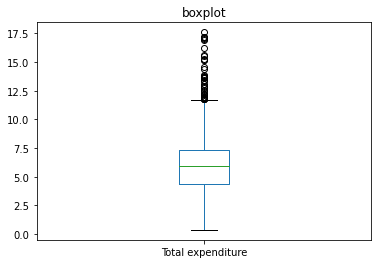

In [225]:
df[['Total expenditure']].plot(kind='box', title='boxplot')

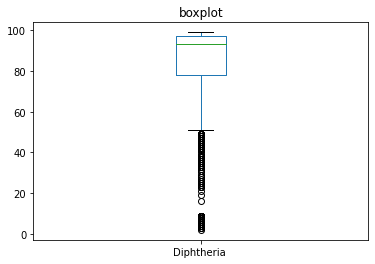

In [226]:
df[['Diphtheria ']].plot(kind='box', title='boxplot')

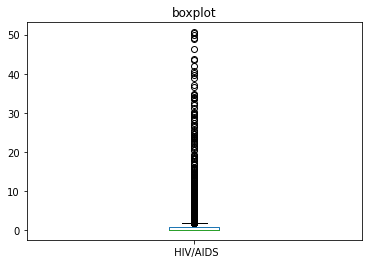

In [227]:
df[[' HIV/AIDS']].plot(kind='box', title='boxplot')

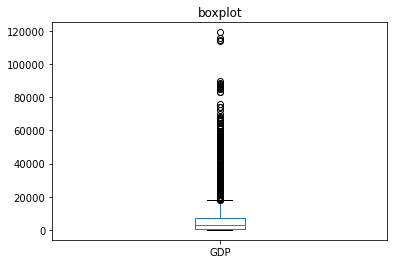

In [228]:
df[['GDP']].plot(kind='box', title='boxplot')

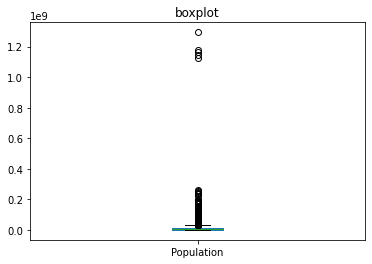

In [229]:
df[['Population']].plot(kind='box', title='boxplot')

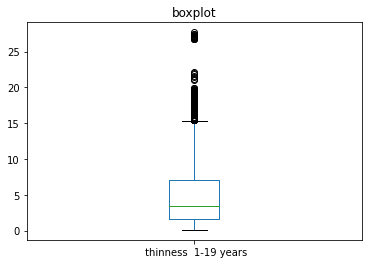

In [230]:
df[[' thinness  1-19 years']].plot(kind='box', title='boxplot')

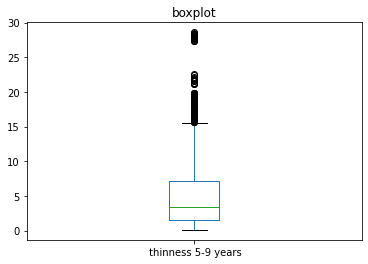

In [231]:
df[[' thinness 5-9 years']].plot(kind='box', title='boxplot')

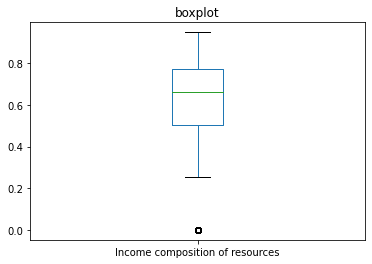

In [232]:
df[['Income composition of resources']].plot(kind='box', title='boxplot')

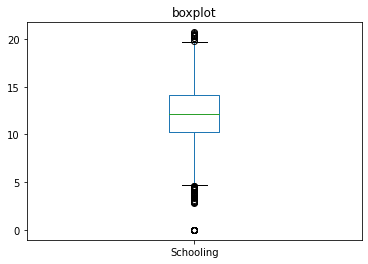

In [233]:
df[['Schooling']].plot(kind='box', title='boxplot')

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## RSCV

In [245]:
params = [{'n_estimators': [50, 100,200,300,400,500], 
          'criterion': ['mse', 'mae'],
           'max_depth': [10, 15, 30, 50, 100, 200],
           'max_features':['auto','sqrt','log2'],
           'random_state':[0, 10, 20, 50, 70, 100],
           'n_jobs':[-1, 1]}]

In [246]:
# randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
RScv = RandomizedSearchCV(rfr, param_distributions = params, 
                          n_iter = 5, cv = 5)
RScv = RScv.fit(X_train, y_train)

In [248]:
preds = RScv.predict(X_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  1.927836


In [140]:
X_train.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
1911,2014,61.0,0,6.06,177.638288,80.940461,3,6.8,0,93.0,...,93.0,0.1,975.498560,5.137232e+06,0.8,0.7,0.945,17.7,1,0
954,2007,291.0,2,9.02,545.438957,75.000000,0,31.9,3,78.0,...,81.0,10.0,8352.817110,1.489193e+06,6.9,6.8,0.645,12.4,0,1
1049,2008,162.0,0,8.92,754.959713,99.000000,0,42.4,0,99.0,...,99.0,0.1,7946.944346,1.275338e+07,3.8,3.9,0.000,15.4,0,1
1714,2000,185.0,0,2.23,0.000000,87.000000,0,61.5,0,85.0,...,85.0,0.1,7483.158469,1.275338e+07,0.3,0.3,0.000,0.0,0,1
2021,2001,142.0,17,4.22,302.535906,80.940461,0,46.1,22,9.0,...,9.0,0.5,1981.243653,2.626136e+07,1.4,1.4,0.677,13.4,0,1


In [141]:
y_train.head()

1911    81.6
954     61.6
1049    72.1
1714    67.0
2021    72.4
Name: Life expectancy , dtype: float64

In [142]:
X.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,164.796448,30.407445,52.972722,740.321185,80.956993,2427.855874,38.236332,42.179303,82.548311,...,82.321434,1.747712,7492.538538,1.276209e+07,4.850502,4.881301,0.627426,11.999265,0.174863,0.825137
std,4.61056,124.292079,118.114450,182.113311,1990.930605,22.531363,11485.970937,19.850186,160.700547,23.340548,...,23.629576,5.085542,13157.128927,5.390628e+07,4.396597,4.484890,0.205131,3.253691,0.379915,0.379915
min,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2003.75000,74.000000,0.000000,1.107500,4.853964,80.940461,0.000000,19.400000,0.000000,78.000000,...,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000,0.000000,1.000000
50%,2007.50000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,...,93.000000,0.100000,3112.560501,3.640009e+06,3.400000,3.400000,0.662000,12.100000,0.000000,1.000000
75%,2011.25000,228.000000,22.000000,8.800000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,...,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.773000,14.100000,0.000000,1.000000
max,2015.00000,723.000000,1800.000000,738.251295,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,1.000000


## XGB

In [143]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

In [144]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 40, seed = 100)
xgb_r.fit(X_train, y_train)
preds = xgb_r.predict(X_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

[23:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  1.926519


In [145]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('r2 score: ',metrics.r2_score(y_test,preds))

r2 score:  0.9602585147198567


## SVM

In [146]:
from sklearn.svm import SVR
svmr = SVR(kernel = 'rbf')
svmr.fit(X_train, y_train)
preds = svmr.predict(X_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  10.147818


In [147]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('r2 score: ',metrics.r2_score(y_test,preds))

r2 score:  -0.10266307227970461


## Random Forest Regressor

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 10)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  1.876848


In [149]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('r2 score: ',metrics.r2_score(y_test,preds))

r2 score:  0.9622813958364015


## RANSAC

In [168]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(min_samples=10, max_trials=50, loss='absolute_loss', random_state=42, residual_threshold=50)
ransac.fit(X_train, y_train)
preds = ransac.predict(X_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  4.103329


In [161]:
print('r2 score: ',metrics.r2_score(y_test,preds))

r2 score:  0.7473307218234089


## Catboost

In [201]:
!pip install catboost

     -------------------------------------- 73.9/73.9 MB 264.7 kB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 KB 168.6 kB/s eta 0:00:00


In [203]:
from catboost import CatBoostRegressor
cat= CatBoostRegressor(loss_function='RMSE')
cat.fit(X_train, y_train, eval_set = (X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.056991
0:	learn: 9.0337803	test: 9.2394595	best: 9.2394595 (0)	total: 3.09ms	remaining: 3.09s
1:	learn: 8.6331334	test: 8.8368369	best: 8.8368369 (1)	total: 5.57ms	remaining: 2.78s
2:	learn: 8.2778096	test: 8.4755457	best: 8.4755457 (2)	total: 7.98ms	remaining: 2.65s
3:	learn: 7.9353524	test: 8.1410568	best: 8.1410568 (3)	total: 10.9ms	remaining: 2.71s
4:	learn: 7.5901876	test: 7.7857352	best: 7.7857352 (4)	total: 14.2ms	remaining: 2.83s
5:	learn: 7.3054769	test: 7.4989122	best: 7.4989122 (5)	total: 17ms	remaining: 2.81s
6:	learn: 7.0212898	test: 7.2063594	best: 7.2063594 (6)	total: 19.4ms	remaining: 2.75s
7:	learn: 6.7584274	test: 6.9406393	best: 6.9406393 (7)	total: 21.5ms	remaining: 2.67s
8:	learn: 6.5098843	test: 6.6775923	best: 6.6775923 (8)	total: 24.6ms	remaining: 2.71s
9:	learn: 6.2701685	test: 6.4394708	best: 6.4394708 (9)	total: 27.7ms	remaining: 2.75s
10:	learn: 6.0342429	test: 6.2050305	best: 6.2050305 (10)	total: 29.8ms	remaining: 2.68s
11:	learn: 5.

141:	learn: 1.9597235	test: 2.2909422	best: 2.2909422 (141)	total: 322ms	remaining: 1.95s
142:	learn: 1.9565121	test: 2.2903151	best: 2.2903151 (142)	total: 324ms	remaining: 1.94s
143:	learn: 1.9506351	test: 2.2865616	best: 2.2865616 (143)	total: 327ms	remaining: 1.94s
144:	learn: 1.9489942	test: 2.2841994	best: 2.2841994 (144)	total: 329ms	remaining: 1.94s
145:	learn: 1.9454794	test: 2.2828329	best: 2.2828329 (145)	total: 331ms	remaining: 1.94s
146:	learn: 1.9411360	test: 2.2804572	best: 2.2804572 (146)	total: 335ms	remaining: 1.94s
147:	learn: 1.9381745	test: 2.2798482	best: 2.2798482 (147)	total: 338ms	remaining: 1.95s
148:	learn: 1.9348972	test: 2.2762044	best: 2.2762044 (148)	total: 340ms	remaining: 1.94s
149:	learn: 1.9305943	test: 2.2721198	best: 2.2721198 (149)	total: 343ms	remaining: 1.94s
150:	learn: 1.9267535	test: 2.2679293	best: 2.2679293 (150)	total: 345ms	remaining: 1.94s
151:	learn: 1.9220430	test: 2.2622773	best: 2.2622773 (151)	total: 348ms	remaining: 1.94s
152:	learn

286:	learn: 1.4728716	test: 2.0407345	best: 2.0407345 (286)	total: 653ms	remaining: 1.62s
287:	learn: 1.4709344	test: 2.0402352	best: 2.0402352 (287)	total: 655ms	remaining: 1.62s
288:	learn: 1.4692637	test: 2.0387675	best: 2.0387675 (288)	total: 658ms	remaining: 1.62s
289:	learn: 1.4648241	test: 2.0364992	best: 2.0364992 (289)	total: 660ms	remaining: 1.61s
290:	learn: 1.4631574	test: 2.0358904	best: 2.0358904 (290)	total: 662ms	remaining: 1.61s
291:	learn: 1.4606506	test: 2.0359137	best: 2.0358904 (290)	total: 665ms	remaining: 1.61s
292:	learn: 1.4586905	test: 2.0353323	best: 2.0353323 (292)	total: 667ms	remaining: 1.61s
293:	learn: 1.4574363	test: 2.0352112	best: 2.0352112 (293)	total: 669ms	remaining: 1.61s
294:	learn: 1.4549889	test: 2.0344864	best: 2.0344864 (294)	total: 671ms	remaining: 1.6s
295:	learn: 1.4527788	test: 2.0338194	best: 2.0338194 (295)	total: 674ms	remaining: 1.6s
296:	learn: 1.4484531	test: 2.0327511	best: 2.0327511 (296)	total: 676ms	remaining: 1.6s
297:	learn: 1

404:	learn: 1.2371533	test: 1.9642946	best: 1.9642946 (404)	total: 981ms	remaining: 1.44s
405:	learn: 1.2344973	test: 1.9641047	best: 1.9641047 (405)	total: 983ms	remaining: 1.44s
406:	learn: 1.2323744	test: 1.9624059	best: 1.9624059 (406)	total: 985ms	remaining: 1.44s
407:	learn: 1.2307903	test: 1.9622033	best: 1.9622033 (407)	total: 988ms	remaining: 1.43s
408:	learn: 1.2293461	test: 1.9605504	best: 1.9605504 (408)	total: 990ms	remaining: 1.43s
409:	learn: 1.2278641	test: 1.9605045	best: 1.9605045 (409)	total: 992ms	remaining: 1.43s
410:	learn: 1.2272228	test: 1.9604519	best: 1.9604519 (410)	total: 996ms	remaining: 1.43s
411:	learn: 1.2259637	test: 1.9607231	best: 1.9604519 (410)	total: 998ms	remaining: 1.42s
412:	learn: 1.2244539	test: 1.9602456	best: 1.9602456 (412)	total: 1s	remaining: 1.42s
413:	learn: 1.2231556	test: 1.9598543	best: 1.9598543 (413)	total: 1s	remaining: 1.42s
414:	learn: 1.2222417	test: 1.9598349	best: 1.9598349 (414)	total: 1s	remaining: 1.42s
415:	learn: 1.22093

542:	learn: 1.0487441	test: 1.9188851	best: 1.9188851 (542)	total: 1.31s	remaining: 1.1s
543:	learn: 1.0475809	test: 1.9192617	best: 1.9188851 (542)	total: 1.31s	remaining: 1.1s
544:	learn: 1.0460071	test: 1.9183808	best: 1.9183808 (544)	total: 1.32s	remaining: 1.1s
545:	learn: 1.0436493	test: 1.9177581	best: 1.9177581 (545)	total: 1.32s	remaining: 1.1s
546:	learn: 1.0417608	test: 1.9166800	best: 1.9166800 (546)	total: 1.32s	remaining: 1.09s
547:	learn: 1.0400465	test: 1.9157118	best: 1.9157118 (547)	total: 1.32s	remaining: 1.09s
548:	learn: 1.0388678	test: 1.9155014	best: 1.9155014 (548)	total: 1.33s	remaining: 1.09s
549:	learn: 1.0384077	test: 1.9154146	best: 1.9154146 (549)	total: 1.33s	remaining: 1.09s
550:	learn: 1.0371836	test: 1.9142095	best: 1.9142095 (550)	total: 1.34s	remaining: 1.09s
551:	learn: 1.0368128	test: 1.9140652	best: 1.9140652 (551)	total: 1.34s	remaining: 1.09s
552:	learn: 1.0350938	test: 1.9124922	best: 1.9124922 (552)	total: 1.34s	remaining: 1.08s
553:	learn: 1.

678:	learn: 0.8975894	test: 1.8787844	best: 1.8787085 (661)	total: 1.64s	remaining: 775ms
679:	learn: 0.8966523	test: 1.8784237	best: 1.8784237 (679)	total: 1.64s	remaining: 772ms
680:	learn: 0.8959004	test: 1.8783367	best: 1.8783367 (680)	total: 1.64s	remaining: 770ms
681:	learn: 0.8944512	test: 1.8780426	best: 1.8780426 (681)	total: 1.65s	remaining: 767ms
682:	learn: 0.8933086	test: 1.8785462	best: 1.8780426 (681)	total: 1.65s	remaining: 765ms
683:	learn: 0.8917486	test: 1.8783042	best: 1.8780426 (681)	total: 1.65s	remaining: 762ms
684:	learn: 0.8907299	test: 1.8776110	best: 1.8776110 (684)	total: 1.65s	remaining: 760ms
685:	learn: 0.8904585	test: 1.8777210	best: 1.8776110 (684)	total: 1.65s	remaining: 757ms
686:	learn: 0.8888317	test: 1.8778284	best: 1.8776110 (684)	total: 1.66s	remaining: 755ms
687:	learn: 0.8871988	test: 1.8774897	best: 1.8774897 (687)	total: 1.66s	remaining: 752ms
688:	learn: 0.8863922	test: 1.8770718	best: 1.8770718 (688)	total: 1.66s	remaining: 750ms
689:	learn

822:	learn: 0.7636159	test: 1.8618151	best: 1.8617171 (821)	total: 1.97s	remaining: 424ms
823:	learn: 0.7629862	test: 1.8617555	best: 1.8617171 (821)	total: 1.98s	remaining: 422ms
824:	learn: 0.7624057	test: 1.8617702	best: 1.8617171 (821)	total: 1.98s	remaining: 420ms
825:	learn: 0.7616572	test: 1.8614026	best: 1.8614026 (825)	total: 1.98s	remaining: 417ms
826:	learn: 0.7604439	test: 1.8613821	best: 1.8613821 (826)	total: 1.98s	remaining: 415ms
827:	learn: 0.7598013	test: 1.8610445	best: 1.8610445 (827)	total: 1.99s	remaining: 412ms
828:	learn: 0.7594397	test: 1.8606772	best: 1.8606772 (828)	total: 1.99s	remaining: 410ms
829:	learn: 0.7583482	test: 1.8604411	best: 1.8604411 (829)	total: 1.99s	remaining: 408ms
830:	learn: 0.7573858	test: 1.8605600	best: 1.8604411 (829)	total: 1.99s	remaining: 405ms
831:	learn: 0.7564632	test: 1.8600148	best: 1.8600148 (831)	total: 2s	remaining: 403ms
832:	learn: 0.7557369	test: 1.8597407	best: 1.8597407 (832)	total: 2s	remaining: 400ms
833:	learn: 0.75

970:	learn: 0.6618674	test: 1.8442840	best: 1.8442840 (970)	total: 2.31s	remaining: 68.8ms
971:	learn: 0.6614173	test: 1.8442020	best: 1.8442020 (971)	total: 2.31s	remaining: 66.5ms
972:	learn: 0.6609499	test: 1.8441594	best: 1.8441594 (972)	total: 2.31s	remaining: 64.1ms
973:	learn: 0.6604570	test: 1.8442612	best: 1.8441594 (972)	total: 2.31s	remaining: 61.7ms
974:	learn: 0.6603001	test: 1.8443488	best: 1.8441594 (972)	total: 2.31s	remaining: 59.3ms
975:	learn: 0.6597701	test: 1.8441592	best: 1.8441592 (975)	total: 2.32s	remaining: 57ms
976:	learn: 0.6589899	test: 1.8437185	best: 1.8437185 (976)	total: 2.32s	remaining: 54.6ms
977:	learn: 0.6586201	test: 1.8435575	best: 1.8435575 (977)	total: 2.32s	remaining: 52.2ms
978:	learn: 0.6577443	test: 1.8430473	best: 1.8430473 (978)	total: 2.32s	remaining: 49.9ms
979:	learn: 0.6574665	test: 1.8428136	best: 1.8428136 (979)	total: 2.33s	remaining: 47.5ms
980:	learn: 0.6564723	test: 1.8429331	best: 1.8428136 (979)	total: 2.33s	remaining: 45.1ms
9

In [204]:
preds = cat.predict(X_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  1.842551


## Polynomial Regression

In [249]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit_transform(X_train)
sc_x.transform(X_test)
sc_y = StandardScaler()
sc_y.fit_transform(y_train)
sc_y.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[81.6 61.6 72.1 ... 65.  79.8 58.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [239]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# sc_x.fit_transform(X_train)
# sc_x.transform(X_test)
# sc_y = StandardScaler()
# sc_y.fit_transform(y_train)
# sc_y.transform(y_test)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_transform = PolynomialFeatures(degree=5, include_bias=False)
x_poly_train = poly_transform.fit_transform(X_train)
x_poly_test = poly_transform.transform(X_test)

p_regressor = LinearRegression()
p_regressor.fit(x_poly_train, y_train)

LinearRegression()

In [240]:
preds = p_regressor.predict(x_poly_test)
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  7812.351039
